<a href="https://colab.research.google.com/github/nadfai/m22ai582/blob/main/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
train_val_dir = "/content/drive/MyDrive/Colab Notebooks/train_val"
test_dir = "/content/drive/MyDrive/Colab Notebooks/test"
train_path_labels = "/content/drive/MyDrive/Colab Notebooks/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [21]:
# loading the training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
 if filename.endswith('.png'):
 # Loading the images and resizing them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(train_val_dir, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(train_val_dir, filename))
  image_arr = np.array(img)
 # Appending the array to the list of images
  images.append(image_arr)
  labels.append(filename)

# Converting the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Converting the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [22]:
x_train.shape

(1000, 128, 128, 3)

In [23]:
x_train[:5]
y_train[:5]

array([ 4, 34, 37, 50,  9])

In [24]:
# loading the test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
 if filename.endswith('.png'):
 # Loading the images and resize them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(test_dir, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(test_dir, filename))
  image_arr = np.array(img)
 # Appending the array to the list of images
  images.append(image_arr)
  labels.append(filename)
# Converting the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [25]:
# Converting the lists to NumPy arraysimages = np.array(images)
labels = np.array(labels)
# Saving the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [26]:
x_test.shape

(50, 128, 128, 3)

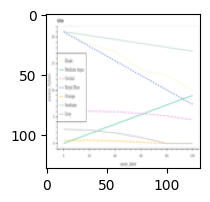

In [27]:
# checking the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [28]:
# defining some classes from the images we have observed
img_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
img_classes[0]
# mapping the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

In [29]:
y_train
y_train.shape
y_test.shape

(50,)

In [30]:
# we need to map the lables from csv to the images
# function for testing the chart sample
def img_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(img_classes[y[index]])

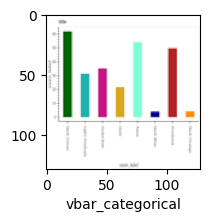

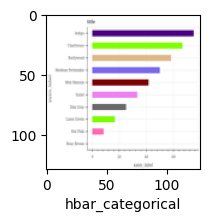

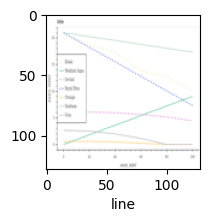

In [31]:
img_sample(x_train,y_train,0)
img_sample(x_train,y_train,208)
img_sample(x_train,y_train,444)

In [32]:
# now we have mapped the corresponding labels to the image

In [33]:
# normalizing the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [34]:
x_test.shape

(1000, 128, 128, 3)

In [35]:
# taking the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [36]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [37]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compiling the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 40s 1s/step - loss: 7.5356 - accuracy: 0.2120
Epoch 2/10
32/32 [==============================] - 34s 1s/step - loss: 1.6130 - accuracy: 0.2150
Epoch 3/10
32/32 [==============================] - 33s 1s/step - loss: 1.6208 - accuracy: 0.2400
Epoch 4/10
32/32 [==============================] - 32s 1s/step - loss: 1.6180 - accuracy: 0.2330
Epoch 5/10
32/32 [==============================] - 32s 1s/step - loss: 1.6038 - accuracy: 0.2320
Epoch 6/10
32/32 [==============================] - 33s 1s/step - loss: 1.5946 - accuracy: 0.2430
Epoch 7/10
32/32 [==============================] - 35s 1s/step - loss: 1.6199 - accuracy: 0.1900
Epoch 8/10
32/32 [==============================] - 33s 1s/step - loss: 1.6108 - accuracy: 0.1960
Epoch 9/10
32/32 [==============================] - 32s 1s/step - loss: 1.6099 - accuracy: 0.2000
Epoch 10/10
32/32 [==============================] - 33s 1s/step - loss: 1.6097 - accuracy: 0.2000


In [38]:
# Splitting the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [39]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 255ms/step - loss: 1.6104 - accuracy: 0.1300


[1.6103650331497192, 0.12999999523162842]

In [40]:
y_predict = model.predict(x_test)
y_predict
y_predict_classes = [np.argmax(ele) for ele in y_predict]
# print("classificaton report : \n",classification_report(y_test,y_predict_classes))

7/7 [==============================] - 2s 254ms/step


In [41]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [42]:
# Printing the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 1.6269 - accuracy: 0.2037 - val_loss: 2.4143 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 22s 22s/step - loss: 2.4426 - accuracy: 0.2087 - val_loss: 2.2502 - val_accuracy: 0.2450
Epoch 3/50
1/1 [==============================] - 20s 20s/step - loss: 2.3163 - accuracy: 0.2650 - val_loss: 1.8463 - val_accuracy: 0.2250
Epoch 4/50
1/1 [==============================] - 21s 21s/step - loss: 1.8694 - accuracy: 0.2450 - val_loss: 1.6663 - val_accuracy: 0.1900
Epoch 5/50
1/1 [==============================] - 20s 20s/step - loss: 1.6439 - accuracy: 0.2025 - val_loss: 1.5890 - val_accuracy: 0.1900
Epoch 6/50
1/1 [==============================] - 16s 16s/step - loss: 1.5497 - accuracy: 0.2025 - val_loss: 1.5595 - val_accuracy: 0.5050
Epoch 7/50
1/1 [==============================] - 17s 17s/step - loss: 1.5152 - accuracy: 0.4800 - val_loss: 1.5337 - val_accuracy: 0.4100
Epoch 8/50
1/1 [===========

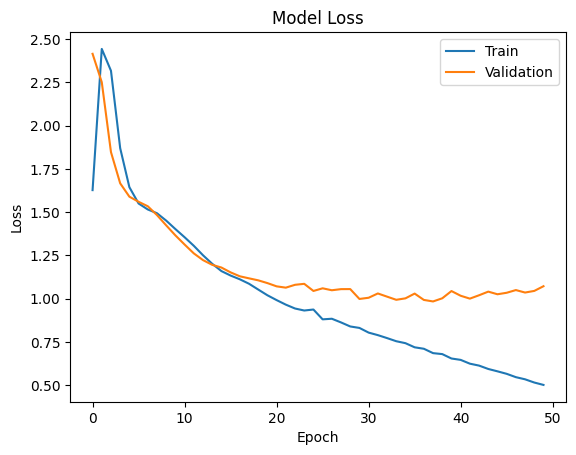

In [43]:
# modifying the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compiling the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plotting the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [44]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 142ms/step - loss: 1.0718 - accuracy: 0.6050


[1.0718028545379639, 0.6050000190734863]

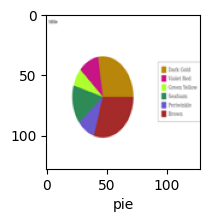

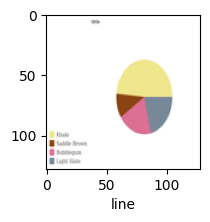

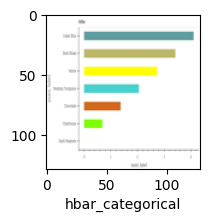

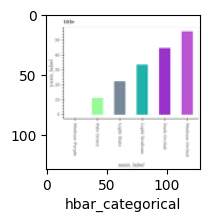

In [45]:
img_sample(x_test,y_test,1)
img_sample(x_test,y_test,50)
img_sample(x_test,y_test,25)
img_sample(x_test,y_test,30)

In [46]:
# Observation: we can see some wrong predictions

In [47]:
y_predict = cnn_model.predict(x_test)
y_predict[:5]

7/7 [==============================] - 1s 186ms/step


array([[5.8284694e-01, 2.2507432e-01, 1.3336620e-01, 6.1062556e-03,
        5.2606165e-02],
       [1.8849011e-01, 4.7896487e-05, 1.2898986e-03, 3.9906395e-03,
        8.0618137e-01],
       [7.0418954e-01, 2.0920325e-03, 1.2266317e-05, 1.9474322e-04,
        2.9351154e-01],
       [1.4436158e-02, 1.2432900e-04, 8.3758932e-06, 1.8493284e-04,
        9.8524618e-01],
       [7.0880097e-01, 6.6015348e-02, 1.8470597e-01, 4.5096409e-03,
        3.5967991e-02]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5]

[0, 4, 0, 4, 0]

In [49]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [50]:
# here we see some values are not matching

'dot_line'

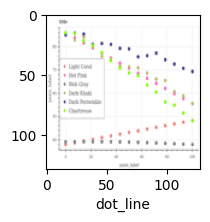

In [51]:
# test actual and predicted
# img_sample(x_test,y_test,1) #actual
# img_classes[y_classes[1]] #predicted
# img_sample(x_test,y_test,10) #actual
# img_classes[y_classes[10]] #predicted
img_sample(x_test,y_test,15) #actual
img_classes[y_classes[15]] #predicted

In [52]:
# some values are not matching

In [53]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.47      0.59      0.52        37
           1       0.86      0.68      0.76        44
           2       0.62      0.33      0.43        48
           3       0.47      0.64      0.54        33
           4       0.68      0.84      0.75        38

    accuracy                           0.60       200
   macro avg       0.62      0.62      0.60       200
weighted avg       0.63      0.60      0.60       200



In [54]:
# Generating the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  2  0  4  9]
 [ 9 30  2  2  1]
 [11  2 16 17  2]
 [ 1  0  8 21  3]
 [ 4  1  0  1 32]]


Text(95.72222222222221, 0.5, 'Actual')

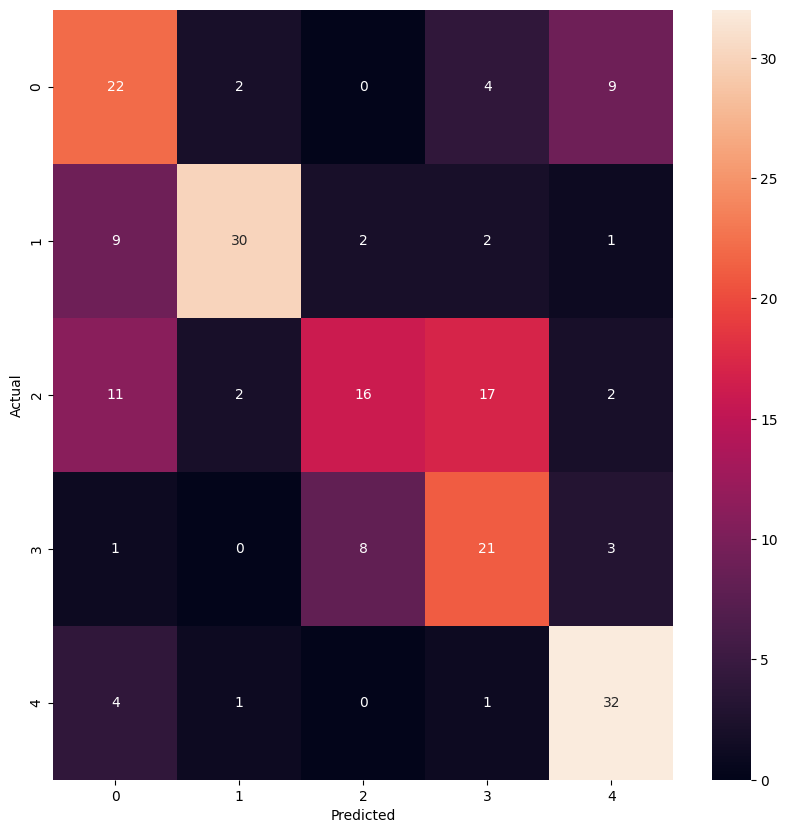

In [55]:
# Plotting the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [56]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Loading the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [58]:
# Replacing the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [59]:
# Freezing the weights of all layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False

In [60]:
# Compiling the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Printing the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [65]:
# Setting up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [66]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [67]:
# Training the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: ignored